### Now, as  all functions are packed into a class, we can use it  in a much simpler way
In fact, the fast gradient method works for all classes. For demostration, here we choose a different class "7" 

In [1]:
# first, we need to ad the path-to-AdversarialMNIST-folder into sys.path
%matplotlib inline
import sys
sys.path.append('../')
from AdversarialMNIST.AdversarialMNIST import AdversarialMNIST

import numpy as np

model = AdversarialMNIST()

### load MNIST data for further usage

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


### As the first step, we need a model

In [ ]:
model.fit(learning_rate=1e-4, max_steps=20000, dropout=0.5, model_path='../model/MNIST.ckpt')

### Or, we also can load previous model

In [20]:
model.load_model(model_path='../model/MNIST.ckpt')

load model from ../model/MNIST.ckpt


In [4]:
data = mnist.test.next_batch(10)
x = data[0]
y = data[1]

Once we have loaded or trained a model, we can use predict() to make prediction

In [5]:
result = model.predict(x, True)

In [6]:
result[0]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
np.array(list(map(lambda x: np.max(x), result[1])))

array([ 1.        ,  1.        ,  0.99999905,  0.99999928,  0.99998534,
        1.        ,  0.99996662,  0.99996769,  0.99561852,  1.        ], dtype=float32)

Similar to previous version, set verbose=1, the function will generate all figures to target path

generate for 0 images
generate adversarial image after 1 iterations
Difference Measure: 2.04385e-19
generate adversarial image after 451 iterations
Difference Measure: 14.8534
generate adversarial image after 148 iterations
Difference Measure: 2.9364
generate adversarial image after 175 iterations
Difference Measure: 5.86939
generate adversarial image after 111 iterations
Difference Measure: 3.82954
generate adversarial image after 148 iterations
Difference Measure: 3.25558
generate adversarial image after 175 iterations
Difference Measure: 3.89958
generate adversarial image after 196 iterations
Difference Measure: 3.50134
generate adversarial image after 182 iterations
Difference Measure: 6.15095
generate adversarial image after 64 iterations
Difference Measure: 2.47992


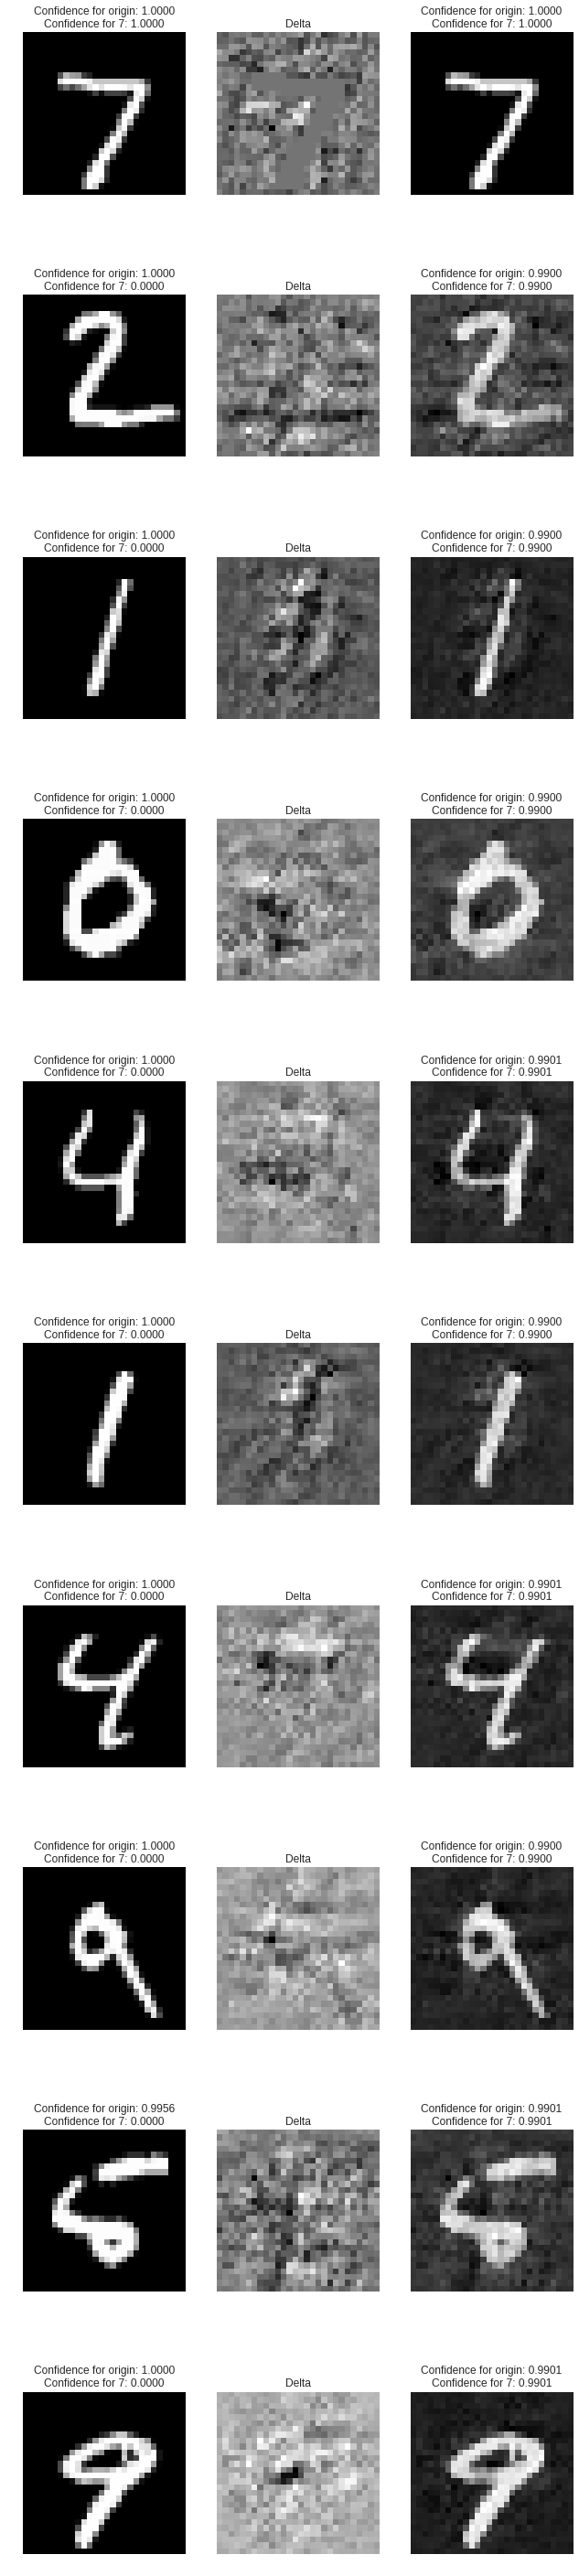

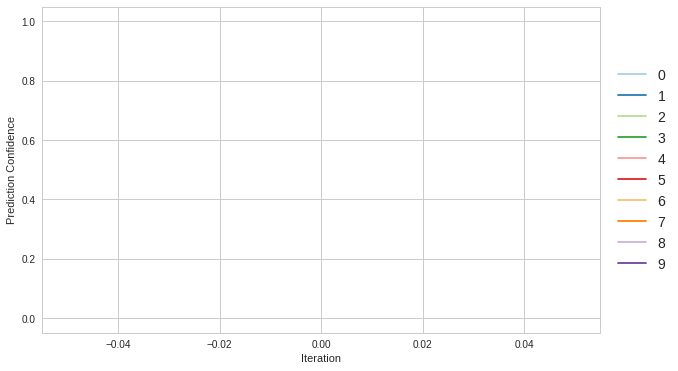

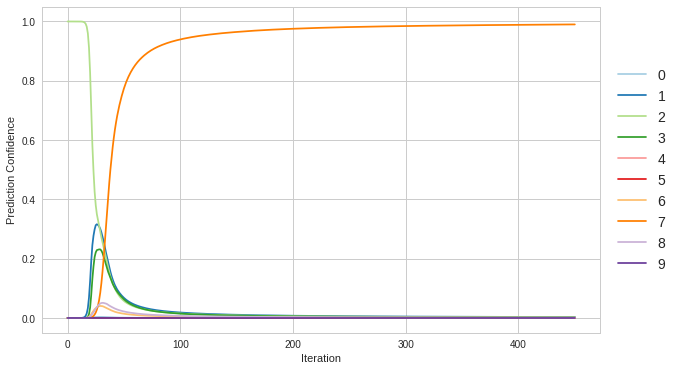

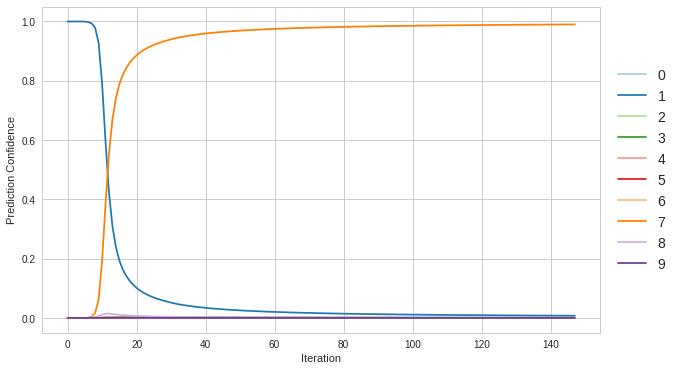

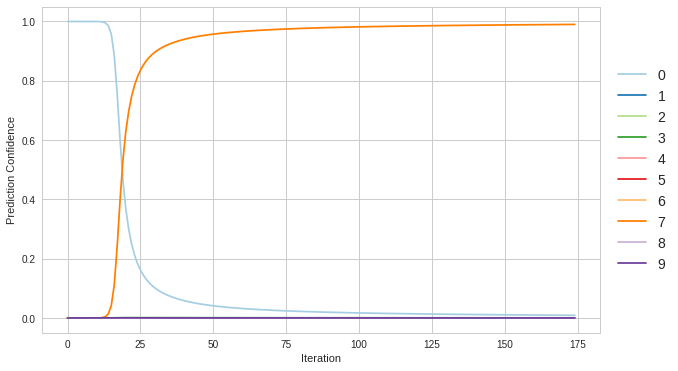

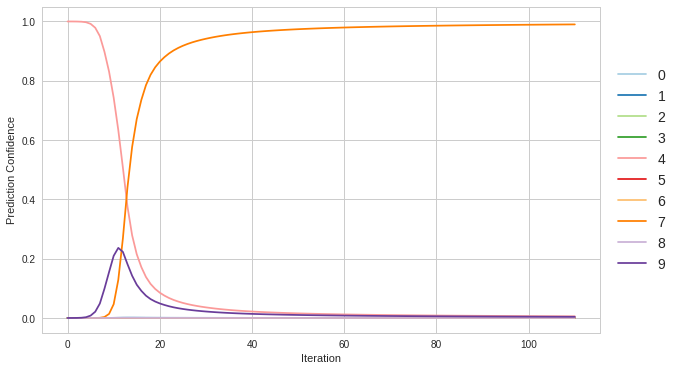

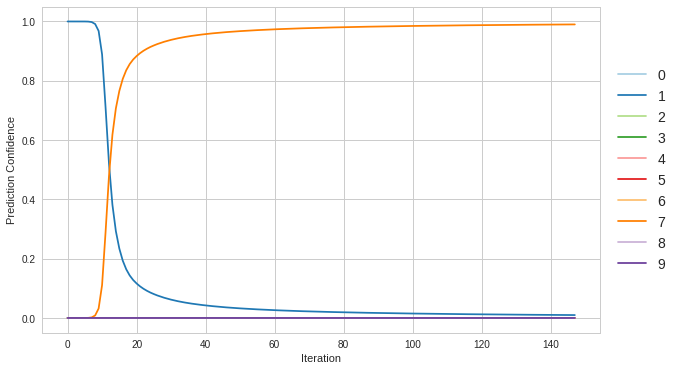

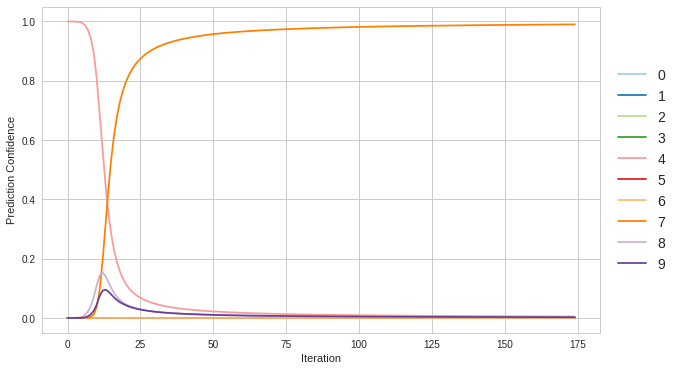

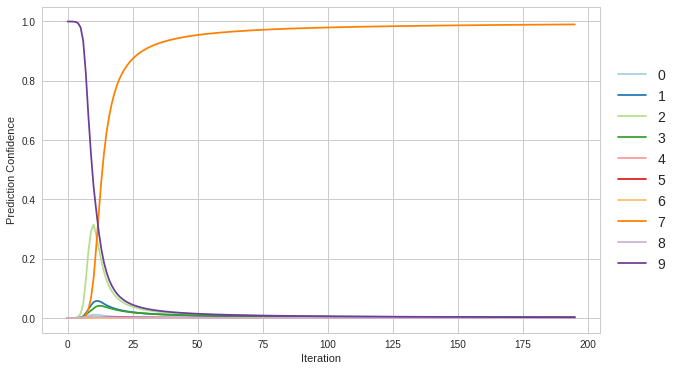

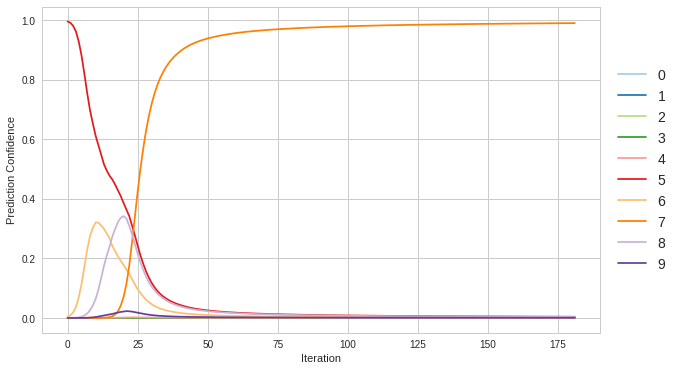

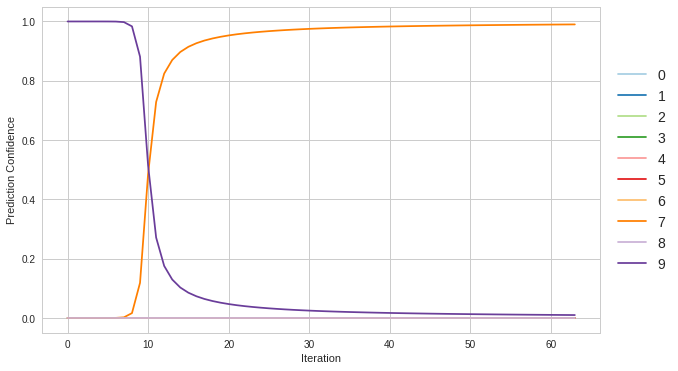

In [21]:
ad_img = model.generate_adversarial(img_list=x, target_class=7, eta=0.01, threshold=0.99, 
                                    save_path='../img/', file_name='adversarial', verbose=1)

### Now, we try to add adversarial images into training set,. At first, we generate the adversarial images for training set, considering the speed, we first test first 3000 samples

In [8]:
ad_images = model.generate_adversarial(img_list=mnist.train.images[0: 3000], target_class=7, eta=0.1, threshold=0.99, 
                                    save_path='../img/', file_name='adversarial', verbose=0)

generate for 0 images
generate for 100 images
generate for 200 images
generate for 300 images
generate for 400 images
generate for 500 images
generate for 600 images
generate for 700 images
generate for 800 images
generate for 900 images
generate for 1000 images
generate for 1100 images
generate for 1200 images
generate for 1300 images
generate for 1400 images
generate for 1500 images
generate for 1600 images
generate for 1700 images
generate for 1800 images
generate for 1900 images
generate for 2000 images
generate for 2100 images
generate for 2200 images
generate for 2300 images
generate for 2400 images
generate for 2500 images
generate for 2600 images
generate for 2700 images
generate for 2800 images
generate for 2900 images


### Combine them with original dataset

In [9]:
new_train_images = np.concatenate((ad_images, mnist.train.images[0: 3000]))
new_train_labels = np.concatenate((mnist.train.labels[0: 3000], mnist.train.labels[0: 3000]))

In [10]:
from sklearn.utils import shuffle
new_train_images, new_train_labels = shuffle(new_train_images, new_train_labels)

In [11]:
model.fit(x=new_train_images, y=new_train_labels, learning_rate=1e-4, 
          max_steps=5000, dropout=0.5, model_path='../model/MNIST_AD.ckpt')

step 0, training accuracy 0.18
step 1000, training accuracy 0.56
step 2000, training accuracy 0.58
step 3000, training accuracy 0.68
step 4000, training accuracy 0.76
step 5000, training accuracy 0.8
Model saved in file:  ../model/MNIST_AD.ckpt


### Now, we use the images from training set, regenerate the adversarial images

In [12]:
ad_images = model.generate_adversarial(img_list=mnist.train.images[1000: 1010], target_class=7, eta=0.1, threshold=0.99, 
                                    save_path='../img/', file_name='adversarial', verbose=0)

generate for 0 images


In [13]:
result = model.predict(ad_images)

In [14]:
result[0]

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

### The model cannot defend this attack

### This true for images not in training images as well

In [15]:
ad_images = model.generate_adversarial(img_list=mnist.train.images[4000: 4010], target_class=7, eta=0.1, threshold=0.99, 
                                    save_path='../img/', file_name='adversarial', verbose=0)

generate for 0 images


In [16]:
result = model.predict(ad_images)

In [17]:
result[0]

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])